In [ ]:
## Beginning

In [1]:
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import networkx as nx  
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt

# display settings (optional)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [3]:
#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
fname = infodir + r'\data\buurten_filtered.csv'

gpdf01 = pd.read_csv(fname)
#this is to verify
gpdf01.head()

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013


In [8]:
gpdf01_1 = gpdf01[gpdf01['Dagdeel'] == 'doordeweeks avond']
before = len(gpdf01)
after = len(gpdf01_1)
print(f"Rows before: {before}, after: {after}, dropped: {before - after}")

Rows before: 1447, after: 518, dropped: 929


In [9]:
gpdf01_1["AA_buurten"] = gpdf01_1["BRT"].str[:2]
df_avg1 = gpdf01_1.groupby("AA_buurten", as_index=False).mean(numeric_only=True)
df_avg1.head(10)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_24748\4049047171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1["AA_buurten"] = gpdf01_1["BRT"].str[:2]


,AA_buurten,OBJECTNUMMER,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,LNG,LAT
0,AA,119.500,137.000000,113.500000,3.000000,0.0,116.500000,82.333333,85.166667,4.887962,52.384230
1,AB,128.000,146.818182,121.727273,1.363636,0.0,123.090909,83.454545,84.818182,4.880027,52.374351
2,AC,135.500,230.250000,176.250000,0.250000,0.0,176.500000,79.750000,79.750000,4.887063,52.373264
3,AD,245.375,25.750000,17.750000,0.625000,0.0,18.375000,5581.500000,5582.000000,4.893645,52.374255
4,AE,184.800,19.400000,15.600000,1.600000,0.0,17.200000,1836.200000,1844.000000,4.896888,52.372574
5,AF,150.000,85.333333,60.000000,2.333333,0.0,62.333333,67.111111,69.888889,4.904784,52.371775
6,AG,157.500,145.500000,114.166667,0.666667,0.0,114.833333,73.500000,75.333333,4.892159,52.365177
7,AH,164.500,119.125000,97.500000,1.250000,0.0,98.750000,81.625000,82.750000,4.889498,52.362195
8,AJ,170.500,339.500000,244.750000,2.250000,0.0,247.000000,73.000000,73.500000,4.912912,52.363930
9,AK,176.500,238.375000,187.500000,0.625000,0.0,188.125000,78.000000,78.000000,4.923073,52.370187


In [23]:
gpdf01_1["AA_buurten"] = gpdf01_1["BRT"].str[:2]
df_avg2 = (
    gpdf01_1
    .groupby("AA_buurten", as_index=False)
    .agg({
        'SDC': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Periode': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Dagdeel': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Cap_open': 'mean',
        'Bez_open': 'mean',
        'Fout': 'mean',
        'Bez_tot': 'mean',
        'Netto_PKD': 'mean',
        'Bruto_PKD': 'mean',        
    })
)
df_avg2.head(10)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_24748\1771406149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1["AA_buurten"] = gpdf01_1["BRT"].str[:2]


,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
0,AA,A,202403-202404,doordeweeks avond,137.000000,113.500000,3.000000,116.500000,82.333333,85.166667
1,AB,A,202403-202404,doordeweeks avond,146.818182,121.727273,1.363636,123.090909,83.454545,84.818182
2,AC,A,202403-202404,doordeweeks avond,230.250000,176.250000,0.250000,176.500000,79.750000,79.750000
3,AD,A,0,doordeweeks avond,25.750000,17.750000,0.625000,18.375000,5581.500000,5582.000000
4,AE,A,202403-202404,doordeweeks avond,19.400000,15.600000,1.600000,17.200000,1836.200000,1844.000000
5,AF,A,202403-202404,doordeweeks avond,85.333333,60.000000,2.333333,62.333333,67.111111,69.888889
6,AG,A,202403-202404,doordeweeks avond,145.500000,114.166667,0.666667,114.833333,73.500000,75.333333
7,AH,A,202403-202404,doordeweeks avond,119.125000,97.500000,1.250000,98.750000,81.625000,82.750000
8,AJ,A,202403-202404,doordeweeks avond,339.500000,244.750000,2.250000,247.000000,73.000000,73.500000
9,AK,A,202403-202404,doordeweeks avond,238.375000,187.500000,0.625000,188.125000,78.000000,78.000000


In [17]:
df_avg2 = df_avg2.sort_values(by=["Bruto_PKD", "Fout"], ascending=[True, False])
df_avg2.head(10)

,AA_buurten,OBJECTNUMMER,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,LNG,LAT
12,EA,536.0,616.666667,74.333333,1.333333,0.0,75.666667,14.333333,14.666667,4.852431,52.390411
10,BA,494.5,105.500000,19.666667,1.333333,0.0,21.000000,17.833333,19.333333,4.809320,52.406470
107,TK,390.0,191.333333,34.000000,2.000000,0.0,36.000000,22.333333,24.000000,4.990176,52.308160
70,MH,1302.5,158.666667,65.333333,1.166667,0.0,66.500000,29.500000,30.166667,4.969490,52.368706
62,KR,1565.5,1254.250000,483.750000,4.250000,0.0,488.000000,31.750000,32.000000,4.887256,52.330108
37,FF,1046.0,391.666667,122.666667,3.666667,0.0,126.333333,29.000000,32.000000,4.781462,52.367084
61,KQ,1560.5,1178.500000,552.166667,7.833333,0.0,560.000000,32.833333,33.166667,4.860620,52.330562
91,NP,831.0,261.333333,91.666667,12.666667,0.0,104.333333,38.000000,42.666667,4.937389,52.384533
93,SA,1765.5,544.500000,254.000000,25.500000,0.0,279.500000,39.500000,43.500000,5.011423,52.310906
79,NB,784.0,358.714286,144.142857,9.428571,0.0,153.571429,42.428571,45.571429,4.893811,52.399900


In [18]:
display(df_avg.describe(include="all"))
df_avg.isna().sum()

,AA_buurten,OBJECTNUMMER,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,LNG,LAT
count,110,110.000000,110.000000,110.000000,110.000000,110.0,110.000000,110.000000,110.000000,110.000000,110.000000
unique,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,909.504062,504.147421,345.177136,9.426843,0.0,354.603979,433.849084,436.201452,4.900385,52.359897
std,NaN,475.897501,334.888811,240.206558,14.047430,0.0,249.057390,1084.331634,1083.964738,0.060481,0.028459
min,NaN,119.500000,19.400000,4.875000,0.000000,0.0,4.875000,14.333333,14.666667,4.781462,52.293736
25%,NaN,552.750000,241.107143,165.275000,1.687500,0.0,167.875000,63.508333,65.250000,4.860147,52.347697
50%,NaN,825.750000,432.839286,300.089286,4.208333,0.0,310.125000,74.625000,76.500000,4.893728,52.362294
75%,NaN,1306.625000,674.000000,494.937500,10.175000,0.0,500.875000,84.000000,85.000000,4.938357,52.377600


AA_buurten      0
OBJECTNUMMER    0
Cap_open        0
Bez_open        0
Fout            0
Object          0
Bez_tot         0
Netto_PKD       0
Bruto_PKD       0
LNG             0
LAT             0
dtype: int64

In [19]:
plt.figure()
plt.plot(df_avg["Periode"], df_avg["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

KeyError: 'Periode'

<Figure size 640x480 with 0 Axes>

In [13]:
gpdf01_1["Periode"].dtype

dtype('O')

In [14]:
gpdf01_1["Periode"] = gpdf01["Periode"].fillna("").astype(str)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_24748\1587416296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1["Periode"] = gpdf01["Periode"].fillna("").astype(str)


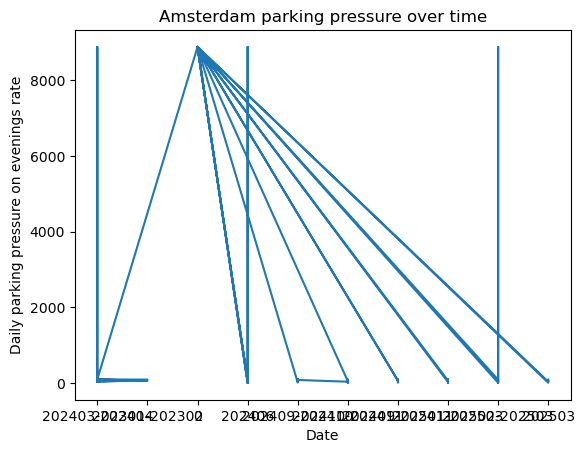

In [15]:
plt.figure()
plt.plot(gpdf01_1["Periode"], gpdf01_1["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

In [16]:
# 1) Add constant
X = sm.add_constant(gpdf01_1[["tmax"]])
y = gpdf01_1["bikes"]

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())


KeyError: "None of [Index(['tmax'], dtype='object')] are in the [columns]"